Worked with:
- Trevor Mathisen
- Viet Nguyen

1. Perform full EDA on fish dataset (FishDataset.csv provided under ML data bank on Canvas). Assume the weight column to be the output and the rest of columns as inputs. Column zero (categorical data) should be converted to numbers using encoding (use preprocessing.LabelEncoder() from sklearn library).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions, log, argmax
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels as sm

In [45]:
filename = 'FishDataset.csv'
data = read_csv(filename)
set_printoptions(precision=3)
data = data.drop('Species', axis=1)
data.head(5)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5,4.0
1,290.0,24.0,26.3,31.2,12.5,4.3
2,340.0,23.9,26.5,31.1,12.4,4.7
3,363.0,26.3,29.0,33.5,12.7,4.5
4,430.0,26.5,29.0,34.0,12.4,5.1


In [46]:
print(data.isnull().sum())

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [47]:
array = data.values
Y1 = data['Weight']
X1 = data.drop('Weight', axis=1)
X1names = X1.columns

In [48]:
data_norm = X1.copy()

# Normalize
norm_scaler = Normalizer().fit(data_norm)
data_norm = norm_scaler.transform(data_norm)
# add output to normalized data
data_norm = pd.DataFrame(data_norm, columns=X1names, index=X1.index)
X1_norm = data_norm.copy()
data_norm['Weight'] = Y1

data_stand = X1.copy()

# Standardize
stand_scaler = StandardScaler().fit(data_stand)
data_stand = stand_scaler.transform(data_stand)
# add output to standardized data
data_stand = pd.DataFrame(data_stand, columns=X1names, index=X1.index)
X1_stand = data_stand.copy()
data_stand['Weight'] = Y1
data_objects = ((data_norm, 'data_norm'), (data_stand, 'data_stand'), (data, "data_raw"))

In [49]:
# Descriptive stats
set_option('display.width', 100)
set_option('display.precision', 1)
for data, name in data_objects:
    print(f"Data: {name}")
    print(data.describe())

Data: data_norm
       Length1  Length2  Length3   Height    Width  Weight
count  1.6e+02  1.6e+02  1.6e+02  1.6e+02  1.6e+02   159.0
mean   5.2e-01  5.6e-01  6.2e-01  1.7e-01  8.7e-02   398.3
std    1.5e-02  1.2e-02  1.0e-02  5.3e-02  1.4e-02   358.0
min    4.9e-01  5.4e-01  5.9e-01  8.9e-02  5.4e-02     0.0
25%    5.0e-01  5.5e-01  6.1e-01  1.5e-01  8.3e-02   120.0
50%    5.2e-01  5.6e-01  6.1e-01  1.7e-01  9.0e-02   273.0
75%    5.3e-01  5.7e-01  6.2e-01  2.3e-01  9.5e-02   650.0
max    5.4e-01  5.8e-01  6.4e-01  2.8e-01  1.3e-01  1650.0
Data: data_stand
       Length1  Length2  Length3   Height    Width  Weight
count  1.6e+02  1.6e+02  1.6e+02  1.6e+02  1.6e+02   159.0
mean  -1.1e-16 -1.5e-16 -7.8e-17  4.5e-17 -2.8e-16   398.3
std    1.0e+00  1.0e+00  1.0e+00  1.0e+00  1.0e+00   358.0
min   -1.9e+00 -1.9e+00 -1.9e+00 -1.7e+00 -2.0e+00     0.0
25%   -7.2e-01 -6.9e-01 -7.0e-01 -7.1e-01 -6.1e-01   120.0
50%   -1.1e-01 -1.0e-01 -1.6e-01 -2.8e-01 -1.0e-01   273.0
75%    6.5e-01  6.6e-01

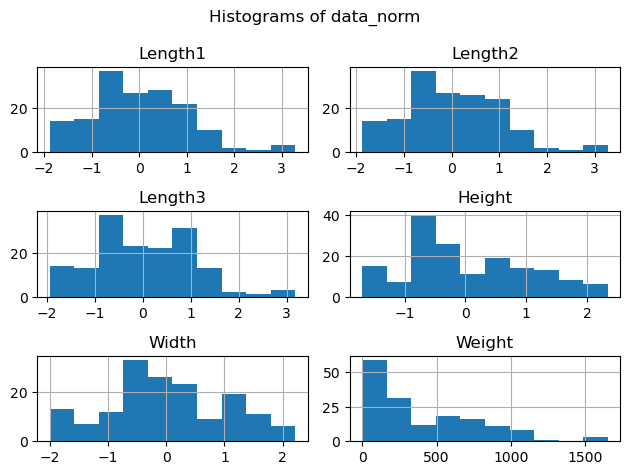

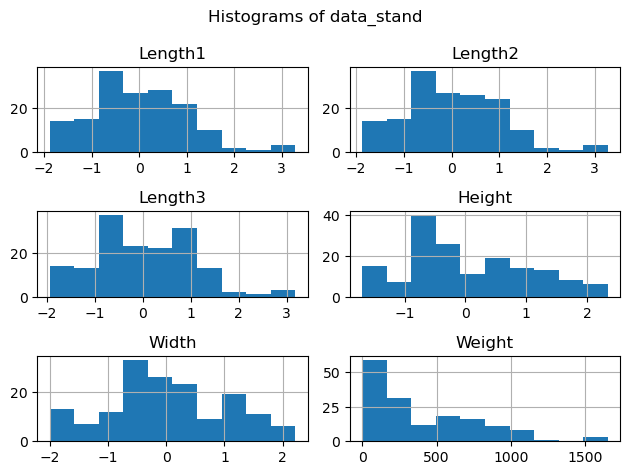

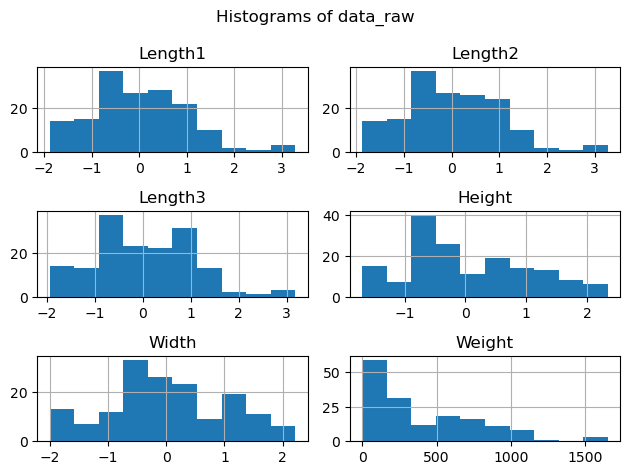

In [50]:
# Histograms
for data, name in data_objects:
    data_stand.hist()
    plt.suptitle(f"Histograms of {name}")
    plt.tight_layout()
    plt.show()

         Length1  Length2  Length3  Height  Width   Weight
Length1  1.0e+00      0.9     -0.7    -0.9   -0.3 -7.3e-02
Length2  8.7e-01      1.0     -0.8    -0.8   -0.1 -1.3e-01
Length3 -6.9e-01     -0.8      1.0     0.4   -0.2 -1.2e-01
Height  -9.2e-01     -0.8      0.4     1.0    0.5  1.8e-01
Width   -3.4e-01     -0.1     -0.2     0.5    1.0  1.2e-01
Weight  -7.3e-02     -0.1     -0.1     0.2    0.1  1.0e+00


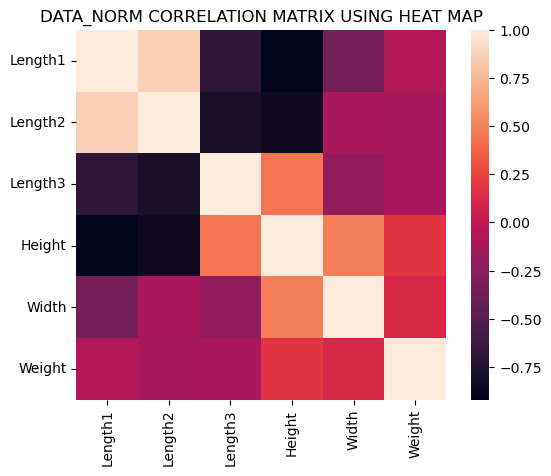

<Figure size 640x480 with 0 Axes>

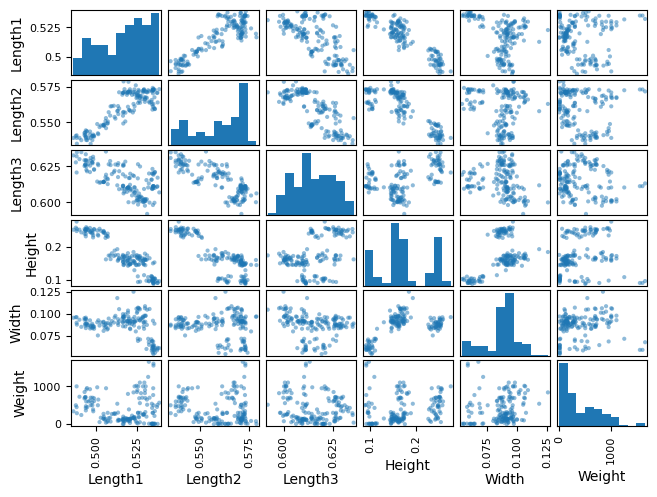

         Length1  Length2  Length3  Height  Width   Weight
Length1  1.0e+00      0.9     -0.7    -0.9   -0.3 -7.3e-02
Length2  8.7e-01      1.0     -0.8    -0.8   -0.1 -1.3e-01
Length3 -6.9e-01     -0.8      1.0     0.4   -0.2 -1.2e-01
Height  -9.2e-01     -0.8      0.4     1.0    0.5  1.8e-01
Width   -3.4e-01     -0.1     -0.2     0.5    1.0  1.2e-01
Weight  -7.3e-02     -0.1     -0.1     0.2    0.1  1.0e+00


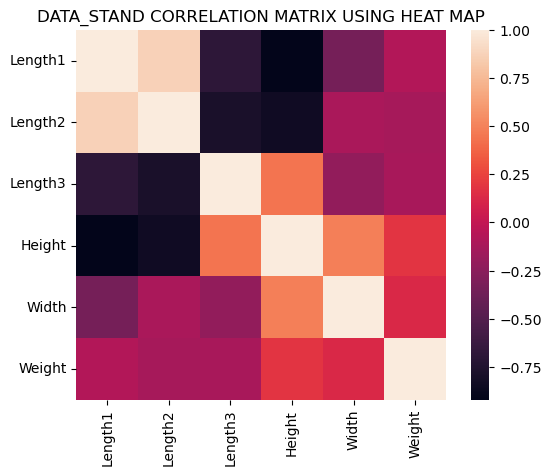

<Figure size 640x480 with 0 Axes>

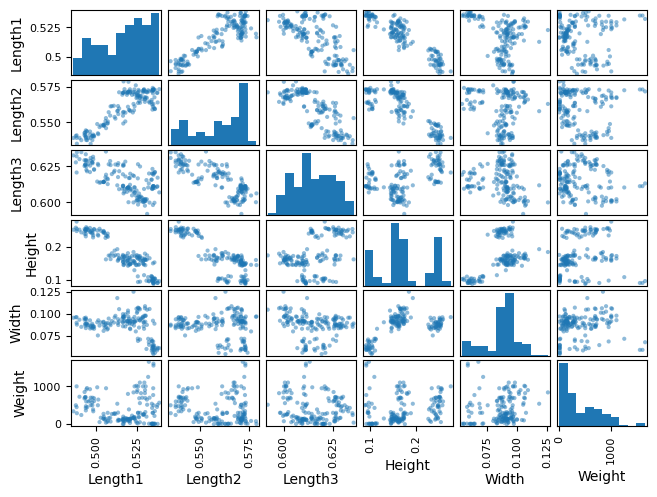

         Length1  Length2  Length3  Height  Width   Weight
Length1  1.0e+00      0.9     -0.7    -0.9   -0.3 -7.3e-02
Length2  8.7e-01      1.0     -0.8    -0.8   -0.1 -1.3e-01
Length3 -6.9e-01     -0.8      1.0     0.4   -0.2 -1.2e-01
Height  -9.2e-01     -0.8      0.4     1.0    0.5  1.8e-01
Width   -3.4e-01     -0.1     -0.2     0.5    1.0  1.2e-01
Weight  -7.3e-02     -0.1     -0.1     0.2    0.1  1.0e+00


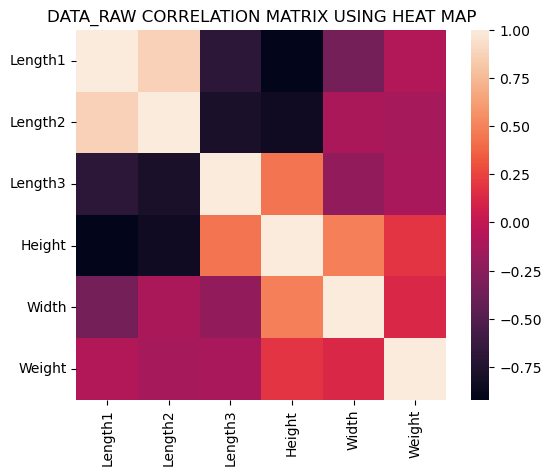

<Figure size 640x480 with 0 Axes>

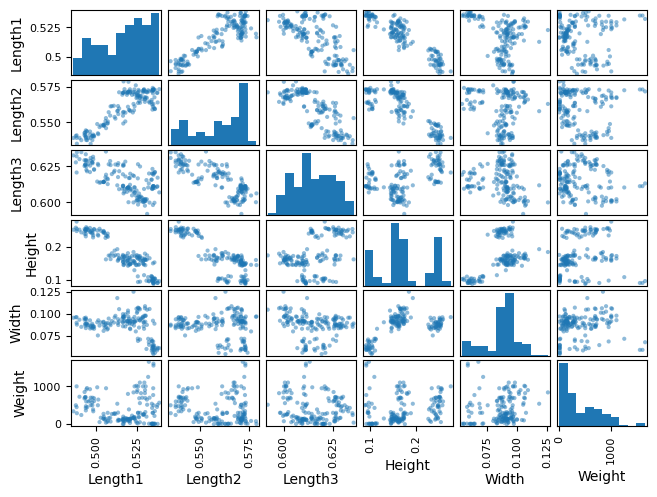

In [51]:
for data, name in data_objects:
    plt.figure() # new plot
    #plt.tight_layout()
    corMat = data_norm.corr(method='pearson')
    print(corMat)
    ## plot correlation matrix as a heat map
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.title(f"{name.upper()} CORRELATION MATRIX USING HEAT MAP")
    plt.show()
    
    ## scatter plot of all data
    plt.figure()
    # # The output overlaps itself, resize it to display better (w padding)
    scatter_matrix(data_norm)
    plt.tight_layout(pad=0.1)
    plt.show()

In [52]:
NUM_FEATURES = 5
model = LinearRegression()
rfe = RFE(model, n_features_to_select = NUM_FEATURES)
fit = rfe.fit(X1, Y1)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
score = rfe.score(X1,Y1)
print("Model Score with selected features is: ", score)

Num Features: 5
Selected Features: [ True  True  True  True  True]
Feature Ranking: [1 1 1 1 1]
Model Score with selected features is:  0.8852867046546207


Raw Data
range(1, 6)
Num Features: 1
Selected Features: [False False  True False False]
Feature Ranking: [2 5 1 3 4]
Num Features: 2
Selected Features: [ True False  True False False]
Feature Ranking: [1 4 1 2 3]
Num Features: 3
Selected Features: [ True False  True  True False]
Feature Ranking: [1 3 1 1 2]
Num Features: 4
Selected Features: [ True False  True  True  True]
Feature Ranking: [1 2 1 1 1]
Num Features: 5
Selected Features: [ True  True  True  True  True]
Feature Ranking: [1 1 1 1 1]


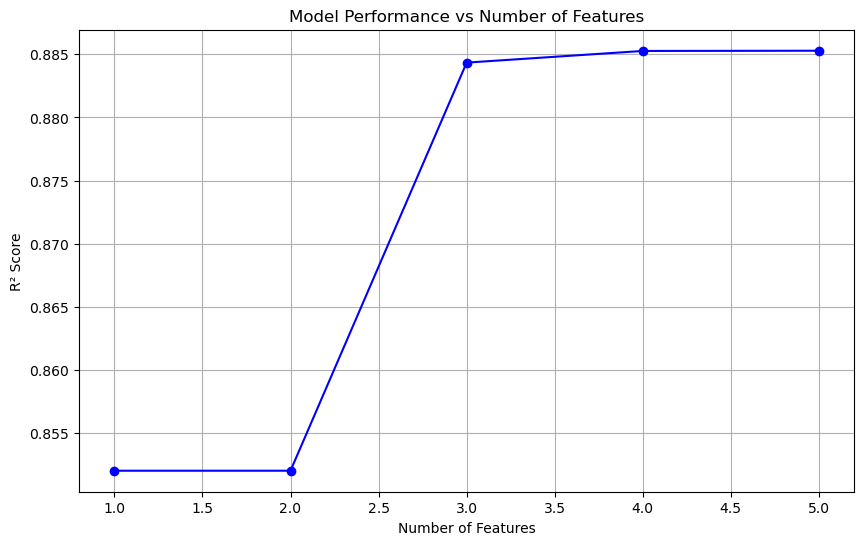

Optimal number of features: 5
Best score: 0.8853


In [53]:
def determine_optimal_number_of_features(X, Y):
    feature_counts = range(1, X.shape[1] + 1)
    scores = []
    print(feature_counts)
    for num_features in feature_counts:
        model = LinearRegression()
        rfe = RFE(model, n_features_to_select = num_features)
        fit = rfe.fit(X, Y)
        print("Num Features:", fit.n_features_)
        print("Selected Features:", fit.support_)
        print("Feature Ranking:", fit.ranking_)
        scores.append(rfe.score(X,Y))
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(feature_counts, scores, 'b-', marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('R² Score')
    plt.title('Model Performance vs Number of Features')
    plt.grid(True)
    plt.show()
    best_num_features = feature_counts[argmax(scores)]
    print(f"Optimal number of features: {best_num_features}")
    print(f"Best score: {max(scores):.4f}")
    return feature_counts, scores
print("Raw Data")
feature_counts, scores = determine_optimal_number_of_features(X1, Y1)

In [54]:
def determine_features_within_threshold(_feature_counts, _scores):
    best_score = max(_scores)
    best_score_index = argmax(_scores)
    threshold = best_score * 0.99
    best_num_features = _feature_counts[best_score_index]
    i = best_score_index
    for i in range(best_score_index, 0, -1):
        if _scores[i] < threshold:
            print(f"Lowest number of features within 1% of best score: {_feature_counts[i]}")
            break
print("Raw Data")
determine_features_within_threshold(feature_counts, scores)

Raw Data
Lowest number of features within 1% of best score: 2
